In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

In [3]:
from langchain_groq import ChatGroq
llm = ChatGroq(model = "llama-3.1-8b-instant")

In [4]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display

In [5]:
class State(TypedDict):
    topic: str
    characters: str
    settings: str
    premises: str
    story_intro: str

In [6]:
def generate_characters(state: State):
    """Generate character descriptions"""
    msg = llm.invoke(f'Create two character names and brief traits for a story about {state['topic']}')
    return {'characters': msg.content}

In [12]:
def generate_setting(state: State):
    """Generate a story setting"""
    msg = llm.invoke(f'Describe a vivid setting for a story about {state['topic']}')
    return {'settings': msg.content}

In [13]:
def generate_premise(state: State):
    """Generate a story premise"""
    msg = llm.invoke(f'Generate a one-sentence plot premise for a story about {state['topic']}')
    return {'premises': msg.content}

In [22]:
def combined_elements(state: State):
    """Combine characters, setting, and premise into an intro"""
    msg = llm.invoke(
        f"Write a short introduction using these elements: \n"
        f"Characters: {state['characters']}"
        f"Setting: {state['settings']}"
        f"Premise: {state['premises']}"
    )
    return {"story_intro": msg.content}


In [23]:
graph = StateGraph(State)
graph.add_node('character', generate_characters)
graph.add_node('setting', generate_setting)
graph.add_node('premise', generate_premise)
graph.add_node('combine', combined_elements)

graph.add_edge(START, 'character')
graph.add_edge(START, 'setting')
graph.add_edge(START, 'premise')
graph.add_edge('character', 'combine')
graph.add_edge('setting', 'combine')
graph.add_edge('premise', 'combine')
graph.add_edge('combine', END)


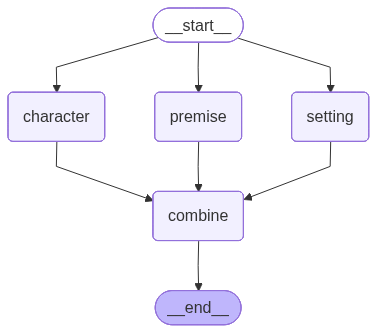

In [24]:
compiled_graph = graph.compile()

graph_image = display(Image(compiled_graph.get_graph().draw_mermaid_png()))
graph_image

In [25]:
state = {'topic': 'time travel'}
result = compiled_graph.invoke(state)
result

{'topic': 'time travel',
 'characters': "Here are two character names with brief traits for a story about time travel:\n\n1. **Ethan Thompson**\nAge: 28\nOccupation: Physicist\nPersonality: Ethan is a brilliant and resourceful physicist who has dedicated his life to studying time travel. He's fiercely independent and can come across as aloof, but deep down, he has a strong sense of justice and a desire to protect the timeline.\n\n2. **Lena Grant**\nAge: 25\nOccupation: Historian\nPersonality: Lena is a free-spirited historian who specializes in ancient civilizations. She's passionate, curious, and loves solving mysteries. Her enthusiasm can sometimes get her into trouble, but her quick thinking and sharp instincts often help her get out of sticky situations.\n\nThese two characters will make a great team, with Ethan's scientific expertise complementing Lena's historical knowledge. Together, they'll embark on thrilling adventures through time, navigating the complexities of the timestre